In [16]:
import math
mu = 0.15    #Si中の電子の移動度 [m/Vs]
W = 5e-6    #トランジスタの奥行き [m]
L = 1e-6    #ゲート長 [m]
t = 1e-8   #酸化膜厚さ [m]
p0 = 8.854e-12  #真空の誘電率 [F/m]
pox = 3.9   #酸化シリコンの比誘電率
C = p0*pox/t    #酸化膜の容量
Vt = 0.7    #閾値電圧 [V]

K = mu * W * C / L

In [17]:
def Ilin(Vgs, Vds):
    return K*((Vgs-Vt)*Vds - (Vds**2)/2)
    
def Isat(Vgs):
    return (K/2)*((Vgs-Vt)**2)

#Vds = Vgs - Vtの時の曲線
def Ibou(Vds):
    return K*((Vds)**2)


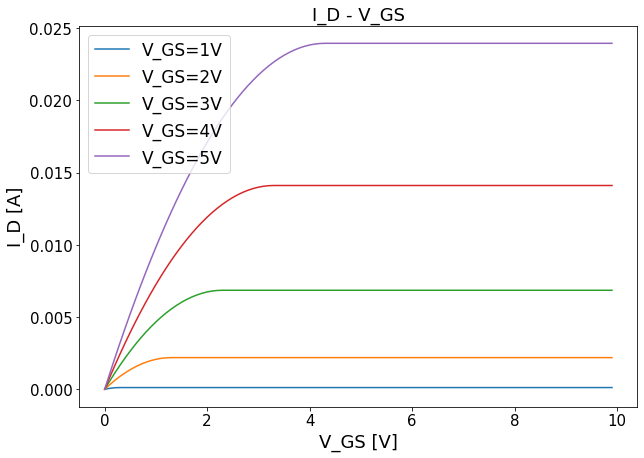

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.tick_params(labelsize=15)
plt.title('I_D - V_GS',fontsize=18)
plt.xlabel("V_GS [V]",fontsize=18)
plt.ylabel("I_D [A]",fontsize=18)


for j in range(1,6):
    X1 = []
    Y1 = []
    for i in range(100):
        ii = i/10
        X1.append(ii)    
        if ii > j - Vt:
            ii = j - Vt
        Y1.append(Ilin(j,ii))
    # 緑色のサインカーブを描く
    plt.plot(X1, Y1, label="V_GS="+str(j)+"V")
"""
X1 = []
Y1 = []
for i in range(100):
    ii = i/10
    X1.append(ii)    
    Y1.append(Isat(ii))
# 緑色のサインカーブを描く
plt.plot(X1, Y1)
"""
plt.legend(prop={'size': 17})

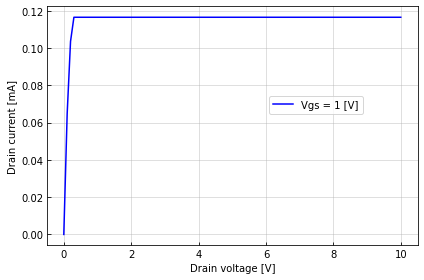

In [19]:
import math
import matplotlib.pyplot as plt
import numpy as np

mu = 0.15    #Si中の電子の移動度 [m/Vs]
W = 5e-6    #トランジスタの奥行き [m]
L = 1e-6    #ゲート長 [m]
t = 1e-8   #酸化膜厚さ [m]
p0 = 8.854e-12  #真空の誘電率 [F/m]
pox = 3.9   #酸化シリコンの比誘電率
C = p0*pox/t    #酸化膜の容量
Vt = 0.7    #閾値電圧 [V]

#線形領域のドレイン電流 [mA]
def Ilin(Vgs, Vt, Vds):
    return 10**3 * mu*C*W*((Vgs-Vt)*Vds-Vds**2/2)/L

#飽和領域のドレイン電流 [mA]
def Isat(Vgs, Vt):
    return 10**3 * mu*C*W*((Vgs-Vt)**2)/(2*L)

#Vds = Vgs - Vtの時の曲線
def Ibou(Vds):
    return 10**3 * mu*C*W*((Vds)**2)/(2*L)

#分布を取得しプロットする関数
def main():
    Vds = np.arange(0.0, 10.1, 0.1)    #ドレイン電圧を0.1刻みでリストへ格納(横軸)
#ドレイン電流を空のリストとして宣言    
    I = [[] for i in range(6)]
    I2 = []

#Vgsを変化させてIを求める
    for j in range(6):        
        for i in range(len(Vds)):
            if Vds[i] <= j-Vt:
                I[j].append(Ilin(j, Vt, Vds[i])) 
            else:
                I[j].append(Isat(j, Vt))

#Vdsを変化させてIを求める
    Vds2 = []
    for i in range(len(Vds)):
        if Vds[i]>4.5:
            break
        Vds2.append(Vds[i])
        I2.append(Ibou(Vds[i]))

    #ここからグラフを作成
    fig = plt.figure(facecolor='w')

    ax = fig.add_subplot(111, xlabel='Drain voltage [V]', ylabel='Drain current [mA]')
    ax.plot(Vds, I[1], color='b', label='Vgs = 1 [V]') #I-V特性をプロット
    ax.tick_params(direction = 'in')   #目盛りを内向きに
    ax.grid(which='major', axis='both', alpha=0.5)    #補助目盛線を表示
    

    ax.legend(loc=(0.6, 0.55))
    plt.tight_layout()  #グラフの配置を自動調整
    plt.show()  #グラフを表示

if __name__ == '__main__':
    main()
